# CLUSTERING

This notebook aim to find and extract the best clusters from the data.
1. Use K-Means algorithm to detect families groups with similar charatteristics.
2. Experiment with different similarity metrics or scale variables to optimize results.
3. View the clusters and interpret the results describing the main profiles.

In [1]:
import numpy as np
import pandas as pd

SEED=48

## IMPORT DATA

In [2]:
df = pd.read_csv("./Array_saved/X_without_null.csv")

In [3]:
df.head()

,Gender,AutonomousCommunity,SchoolOwnership,KindOfPlace,LivingUnit,DependentPersons,WorkConfinement,WorkConfinementsSecondAdult,ChildEarlyEducation1,ChildEarlyEducation2,...,SpaceGym,SpaceOther,SpaceNone,SpaceStreet,SpacePlots,SpaceParks,SpacePublic,SpaceSurroundingOther,SpaceSurroundingNone,ActivitiesOutside
0,2.0,PAIS VASCO,Público,2.0,2,0,1,1.0,0,1,...,0,0,0,0,0,1,1,0,0,2.0
1,2.0,PAIS VASCO,Público,2.0,2,0,1,1.0,0,1,...,0,1,0,0,0,1,0,0,0,3.0
2,2.0,PAIS VASCO,Público,2.0,2,1,1,0.0,0,1,...,1,0,0,1,0,0,1,0,0,3.0
3,2.0,PAIS VASCO,Concertado,2.0,2,0,1,1.0,0,0,...,1,0,0,0,1,1,0,0,0,3.0
4,2.0,PAIS VASCO,Público,2.0,2,0,0,1.0,0,1,...,1,1,0,0,0,0,1,0,0,2.0


### Transform String columns to numeric
This process will need after, when I'll show the representative instance for each cluster

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
oe = OrdinalEncoder().fit(df.loc[:, ["AutonomousCommunity"]])
df.AutonomousCommunity = oe.transform(df.loc[:, ["AutonomousCommunity"]])

In [6]:
# The encoding is made in order with the mode
oe.categories_[0]

array(['ANDALUCÍA', 'ARAGÓN', 'ASTURIAS', 'CANARIAS', 'CANTABRIA',
       'CASTILLA LA MANCHA', 'CASTILLA Y LEÓN', 'CATALUÑA', 'CEUTA',
       'COMUNIDAD VALENCIANA', 'EXTREMADURA', 'GALICIA', 'ILLES BALEARS',
       'LA RIOJA', 'MADRID', 'MELILLA', 'MURCIA', 'NAVARRA', 'PAIS VASCO'],
      dtype=object)

In [7]:
AutonomousCommunity_dict = {}

for key in range(0, len(oe.categories_[0])):
    AutonomousCommunity_dict[ key ] = oe.categories_[0][key]

In [8]:
AutonomousCommunity_dict

{0: 'ANDALUCÍA',
 1: 'ARAGÓN',
 2: 'ASTURIAS',
 3: 'CANARIAS',
 4: 'CANTABRIA',
 5: 'CASTILLA LA MANCHA',
 6: 'CASTILLA Y LEÓN',
 7: 'CATALUÑA',
 8: 'CEUTA',
 9: 'COMUNIDAD VALENCIANA',
 10: 'EXTREMADURA',
 11: 'GALICIA',
 12: 'ILLES BALEARS',
 13: 'LA RIOJA',
 14: 'MADRID',
 15: 'MELILLA',
 16: 'MURCIA',
 17: 'NAVARRA',
 18: 'PAIS VASCO'}

In [9]:
oe = OrdinalEncoder().fit(df.loc[:, ["SchoolOwnership"]])
df.SchoolOwnership = oe.transform(df.loc[:, ["SchoolOwnership"]])

In [10]:
oe.categories_

[array(['Concertado', 'Privado', 'Público'], dtype=object)]

In [11]:
SchoolOwnership_dict = {}

for key in range(0, len(oe.categories_[0])):
    SchoolOwnership_dict[ key ] = oe.categories_[0][key]

## ENCODING

In [12]:
X_transformed = pd.read_csv("./Array_saved/X_embedded.csv")

In [13]:
X_transformed.head()

,ohe__Gender_1.0,ohe__Gender_2.0,ohe__AutonomousCommunity_0.0,ohe__AutonomousCommunity_1.0,ohe__AutonomousCommunity_2.0,ohe__AutonomousCommunity_3.0,ohe__AutonomousCommunity_4.0,ohe__AutonomousCommunity_5.0,ohe__AutonomousCommunity_6.0,ohe__AutonomousCommunity_7.0,...,remainder__ChildrenSchookwork,remainder__HelpOnline,remainder__SchoolCommunication,remainder__ParentsGroups,remainder__ParentsCommunicationReturn,remainder__PriorityCustody,remainder__PriorityContent,remainder__PriorityAutonomy,remainder__PrioritySocialisation,remainder__PriorityEmotional
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,3.0,2.0,1.0,3.0,3.0,2.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0


## Dimensionality Reduction

In [14]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

## K-Means

In [15]:
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
def make_KMeans (X, min_cluster=2, max_cluster=4):

    labels_matrix = np.ndarray((X.shape[0], max_cluster-min_cluster+1))
    index = 0

    for n_clusters in range(min_cluster, max_cluster+1):

        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 48 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)


        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        labels_matrix[:, index] = cluster_labels
        index += 1

    plt.show()

    return labels_matrix

### With Kernel PCA

Try to make clustering with different explained variance (num. components) to find the best configuration of kernel-pca that have a **high silhouette_score** and addresses the **curse of dimensionality**

In [ ]:
# good_S = 0

# for i, n_comps in enumerate(range(3, 10, 1)):

#     print("--------------%d"%(i+1))
#     n_comps = n_comps

#     k_pca = KernelPCA(n_components=n_comps, kernel="linear", random_state=SEED)
#     X_reducted = k_pca.fit_transform(X_transformed)

#     labels_matrix, good_S = make_KMeans(X_reducted, good_S)

For n_clusters = 3 The average silhouette_score is : 0.28019317697806706


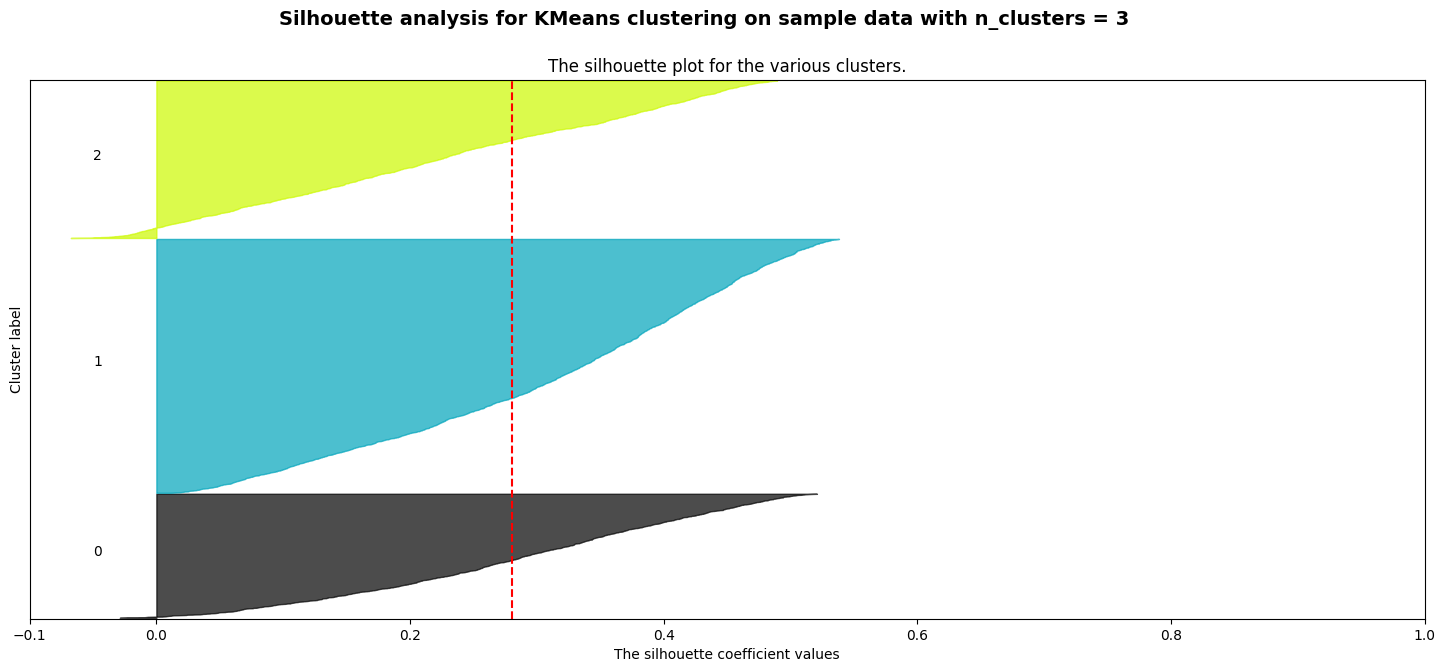

In [26]:
k_pca = KernelPCA(n_components=3, kernel="linear", random_state=SEED)
X_reducted = k_pca.fit_transform(X_transformed)

labels_matrix = make_KMeans(X_reducted, min_cluster=3, max_cluster=3)

In [30]:
NUM_RAP = 3

# Select labels for first configuration (number of cluster selected)
labels = labels_matrix
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (NUM_RAP, df.shape[1]) )

for i in range(0, NUM_RAP ):

    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[labels==i, :].mode()

In [31]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_22904\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_22904\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Público']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


,Gender,AutonomousCommunity,SchoolOwnership,KindOfPlace,LivingUnit,DependentPersons,WorkConfinement,WorkConfinementsSecondAdult,ChildEarlyEducation1,ChildEarlyEducation2,...,SpaceGym,SpaceOther,SpaceNone,SpaceStreet,SpacePlots,SpaceParks,SpacePublic,SpaceSurroundingOther,SpaceSurroundingNone,ActivitiesOutside
0,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0


In [35]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :])
temp = rappresentative_istance.loc[:, mask_col_different]

temp

,WorkConfinement,ChildEarlyEducation2,WorkloadChange,Sleep,Leisure,Sports,Friends,ExtendedFamily,Future,Sex,...,Anxiety,TechnologyUse,ChildPhysicalActivity,Irritability,Boredom,ChildLeavingHome,ChildMissTeacher,ChallengeAny,PriorityCustody,SpacePorch
0,0.0,0.0,7.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0
1,1.0,0.0,3.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0
2,1.0,1.0,3.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

In [38]:
def make_DBSCAN_(X, good_S, eps=0.5, min_samples=5):
    
    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=3).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    
    silhouette_avg = silhouette_score(X[ labels!=-1 ], labels[ labels!=-1 ])

    if silhouette_avg > good_S:
        good_S = silhouette_avg

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("The average silhouette_score is: %f" % silhouette_avg)

    return labels, n_clusters_, good_S

### With Kernel PCA

In [52]:
good_S = 0

# Try to make clustering from 3 to 9 dimensions
for i, n_comps in enumerate(range(3, 10, 1)):

    print("\n--------------%d"%(i+1))
    n_comps = n_comps

    k_pca = KernelPCA(n_components=n_comps, kernel="linear", random_state=SEED)
    X_reducted = k_pca.fit_transform(X_transformed)

    # Try to change the radius of the neighborhood from 0.1 to 0.6
    for eps in range(10, 61, 10):
        print("----------------------------%.2f"%(eps/100))
        labels_matrix, n_cluster, good_S = make_DBSCAN_(X_reducted, good_S, eps=(eps/100))


--------------1
----------------------------0.10
Estimated number of clusters: 9
Estimated number of noise points: 5951
The average silhouette_score is: 0.939638
----------------------------0.20
Estimated number of clusters: 136
Estimated number of noise points: 3962
The average silhouette_score is: -0.067893
----------------------------0.30
Estimated number of clusters: 68
Estimated number of noise points: 1356
The average silhouette_score is: -0.441319
----------------------------0.40
Estimated number of clusters: 11
Estimated number of noise points: 510
The average silhouette_score is: -0.223423
----------------------------0.50
Estimated number of clusters: 9
Estimated number of noise points: 185
The average silhouette_score is: -0.177397
----------------------------0.60
Estimated number of clusters: 2
Estimated number of noise points: 97
The average silhouette_score is: 0.260253

--------------2
----------------------------0.10
Estimated number of clusters: 3
Estimated number of n

Unfortunately there isn't good clusters in any configuration